 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whale_dataset = Path("whale_returns.csv")

In [3]:
whale_returns_df = pd.read_csv(whale_dataset)

In [4]:
# Reading whale returns
whale_returns_df = pd.read_csv(whale_dataset, index_col='Date', parse_dates=True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
#whale_returns_df.index = pd.to_datetime(whale_returns_df.index)
whale_returns_df.index

DatetimeIndex(['2015-03-02', '2015-03-03', '2015-03-04', '2015-03-05',
               '2015-03-06', '2015-03-09', '2015-03-10', '2015-03-11',
               '2015-03-12', '2015-03-13',
               ...
               '2019-04-17', '2019-04-18', '2019-04-22', '2019-04-23',
               '2019-04-24', '2019-04-25', '2019-04-26', '2019-04-29',
               '2019-04-30', '2019-05-01'],
              dtype='datetime64[ns]', name='Date', length=1060, freq=None)

In [6]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
# Drop nulls
whale_returns_df.dropna(inplace=True)

In [8]:
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [9]:
# Reading algorithmic returns
algo_dataset = Path("algo_returns.csv")

In [10]:
algo_returns_df = pd.read_csv(algo_dataset)

In [11]:
algo_returns_df = pd.read_csv(algo_dataset, index_col='Date', parse_dates=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [12]:
#algo_returns_df.index = pd.to_datetime(algo_returns_df.index)
algo_returns_df.index

DatetimeIndex(['2014-05-28', '2014-05-29', '2014-05-30', '2014-06-02',
               '2014-06-03', '2014-06-04', '2014-06-05', '2014-06-06',
               '2014-06-09', '2014-06-10',
               ...
               '2019-04-17', '2019-04-18', '2019-04-22', '2019-04-23',
               '2019-04-24', '2019-04-25', '2019-04-26', '2019-04-29',
               '2019-04-30', '2019-05-01'],
              dtype='datetime64[ns]', name='Date', length=1241, freq=None)

In [13]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [14]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [15]:
# Reading S&P TSX 60 Closing Prices
sp_dataset = Path("sp_tsx_history.csv")

In [16]:
sp_tsx_df = pd.read_csv(sp_dataset, index_col='Date', parse_dates=True)
sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [17]:
# Check Data Types
sp_tsx_df.dtypes
sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [18]:
# Fix Data Types
def changes(Close):
    return float(Close.replace("$","").replace(",",""))

In [19]:
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.strip('$')
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace(",","")
sp_tsx_df['Close'] = sp_tsx_df['Close'].astype(float)


In [20]:
sp_tsx_df.dtypes
sp_tsx_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [21]:
changes("$1",)

1.0

In [22]:
# Calculate Daily Returns
sp_tsx_df.pct_change()
sp_tsx_df['Close'] = sp_tsx_df['Close'].pct_change()

In [23]:
# Drop nulls
sp_tsx_df.dropna(inplace=True)
sp_tsx_df.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [24]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_df.rename(columns={"Close" : "S&P TSX"},inplace=True)

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [25]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
merged_df = whale_returns_df.merge(algo_returns_df, how='inner', left_index=True , right_index=True)
merged_df.merge(sp_tsx_df , how='inner', left_index=True , right_index=True)
merged_all_df = merged_df.merge(sp_tsx_df , how='inner', left_index=True , right_index=True)

In [26]:
merged_all_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

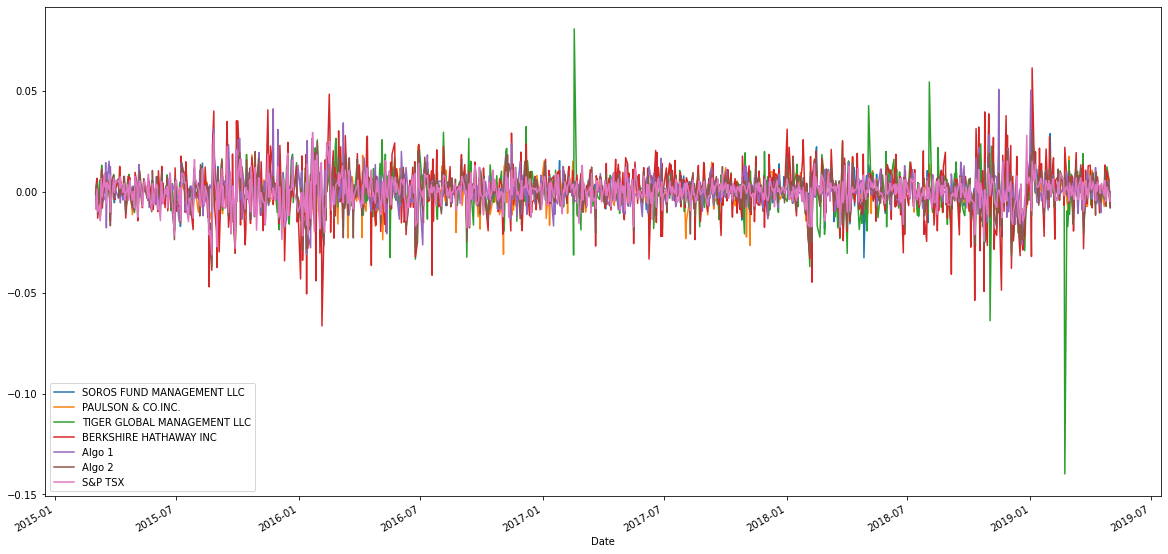

In [27]:
# Plot daily returns of all portfolios
merged_all_df.plot(figsize=(20,10))


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

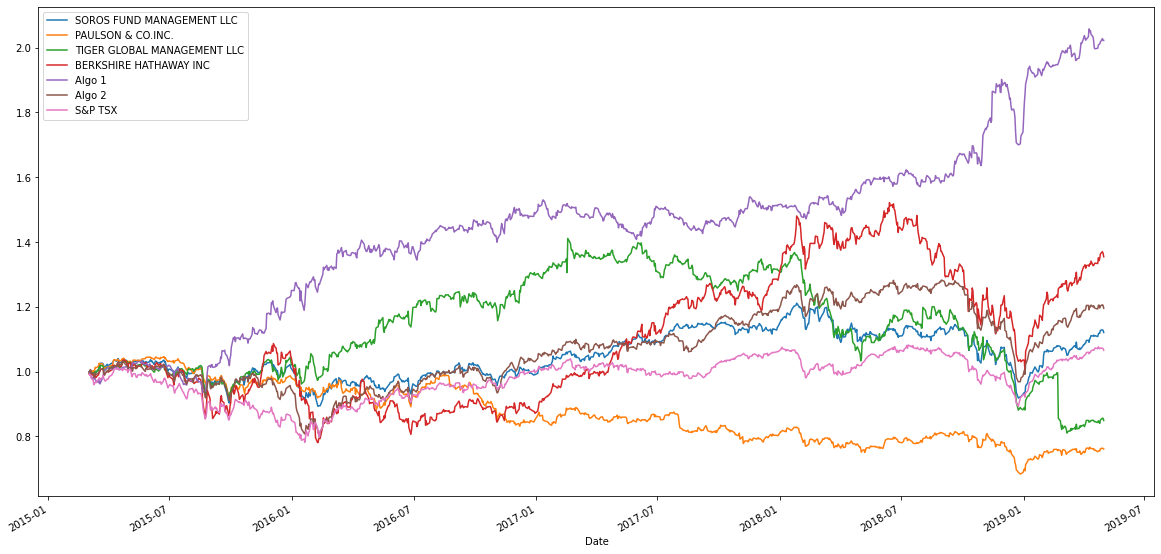

In [28]:
# Calculate cumulative returns of all portfolios
returns_cumprod_df = (1 + merged_all_df).cumprod()

# Plot cumulative returns
returns_cumprod_df.head()
returns_cumprod_df.plot(figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

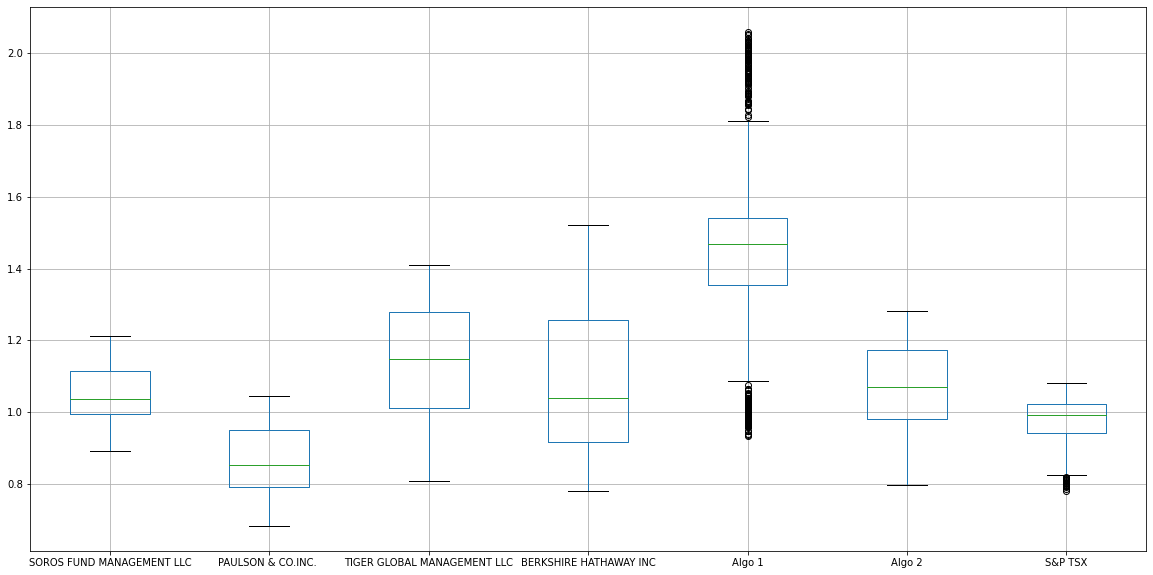

In [29]:
# Box plot to visually show risk
returns_cumprod_df.boxplot(figsize = (20,10))

### Calculate Standard Deviations

In [30]:
# Calculate the daily standard deviations of all portfolios
returns_cumprod_df.std()

SOROS FUND MANAGEMENT LLC      0.070271
PAULSON & CO.INC.              0.090735
TIGER GLOBAL MANAGEMENT LLC    0.148722
BERKSHIRE HATHAWAY INC         0.196871
Algo 1                         0.258839
Algo 2                         0.116607
S&P TSX                        0.064354
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [31]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_df.std()


S&P TSX    0.006637
dtype: float64

In [32]:
# Determine which portfolios are riskier than the S&P TSX 60


### Calculate the Annualized Standard Deviation

In [33]:
# Calculate the annualized standard deviation (252 trading days)
anualized_sp_df = sp_tsx_df.std()*np.sqrt(252)
anualized_sp_df

S&P TSX    0.105365
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day STD'}, xlabel='Date'>

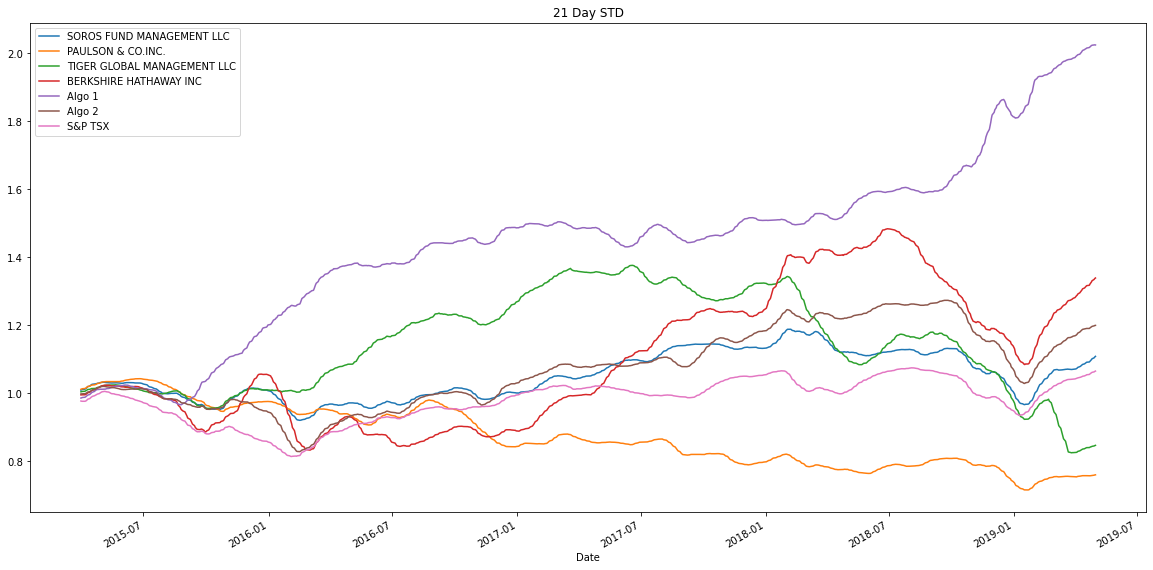

In [34]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
returns_cumprod_df.rolling(window=21).mean().plot(figsize = (20,10) , title = "21 Day STD")

# Plot the rolling standard deviation


### Calculate and plot the correlation

In [35]:
# Calculate the correlation
corrolation = returns_cumprod_df.corr()

# Display de correlation matrix
corrolation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,-0.599250,0.428731,0.879331,0.419924,0.898351,0.809598
PAULSON & CO.INC.,-0.599250,1.000000,-0.167546,-0.710741,-0.876459,-0.736731,-0.604204
TIGER GLOBAL MANAGEMENT LLC,0.428731,-0.167546,1.000000,0.064462,0.047300,0.242755,0.370814
BERKSHIRE HATHAWAY INC,0.879331,-0.710741,0.064462,1.000000,0.524672,0.920725,0.720103
Algo 1,0.419924,-0.876459,0.047300,0.524672,1.000000,0.590275,0.528311
Algo 2,0.898351,-0.736731,0.242755,0.920725,0.590275,1.000000,0.886327
S&P TSX,0.809598,-0.604204,0.370814,0.720103,0.528311,0.886327,1.000000


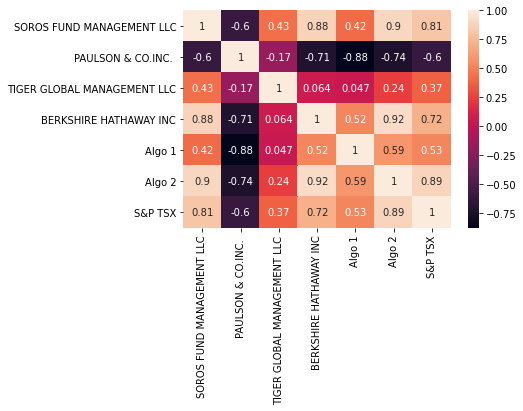

In [36]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(corrolation, annot=True)
plt.show()

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'SOROS FUND 60 DAY ROLLING BETA'}, xlabel='Date'>

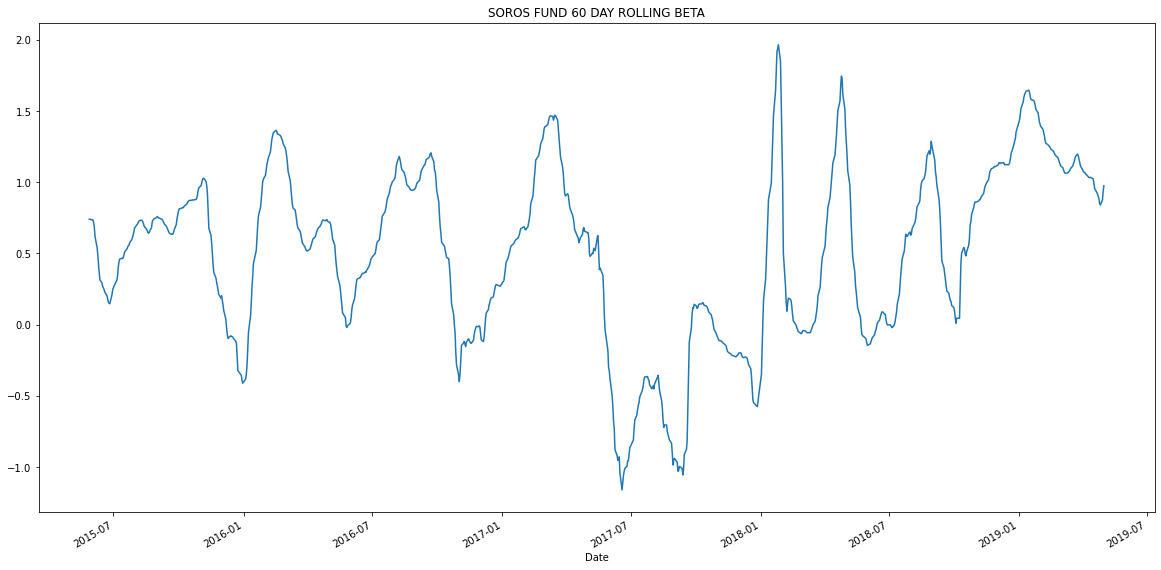

In [37]:
# Calculate covariance of a single portfolio
covariance = returns_cumprod_df["SOROS FUND MANAGEMENT LLC"].rolling(window=60).cov(returns_cumprod_df["S&P TSX"])
              
# Calculate variance of S&P TSX

variance = returns_cumprod_df["S&P TSX"].rolling(window=60).var()

# Computing beta
beta = covariance / variance

# Plot beta trend
beta.plot(title="SOROS FUND 60 DAY ROLLING BETA" , figsize = (20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'RETURNS ROLLING'}, xlabel='Date'>

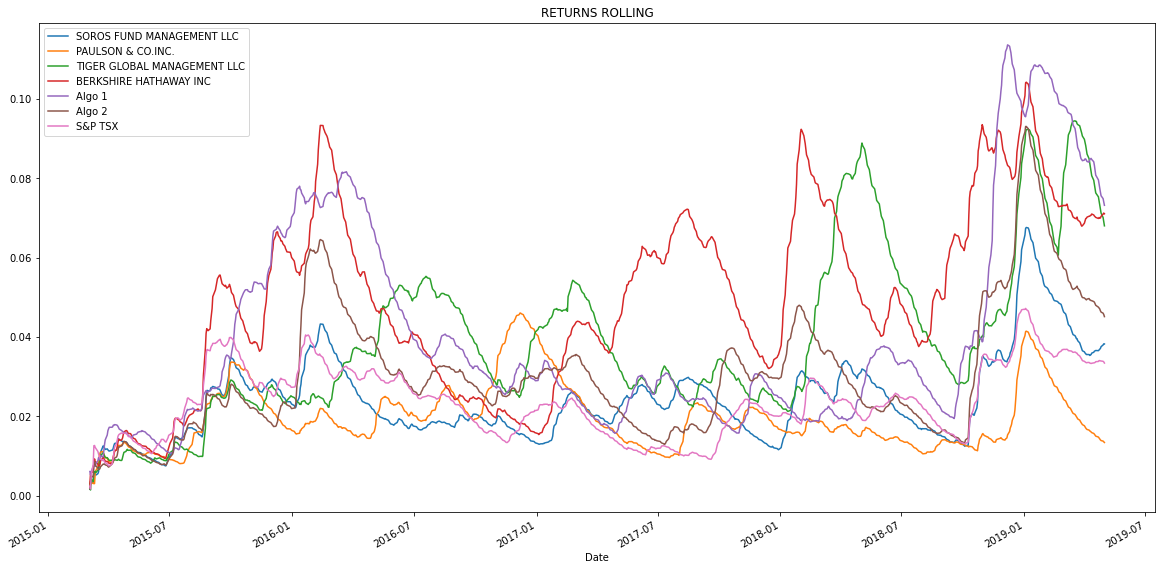

In [38]:
# Use `ewm` to calculate the rolling window
returns_cumprod_df.ewm(halflife=21).std().plot(figsize = (20,10) , title = "RETURNS ROLLING")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [39]:
# Annualized Sharpe Ratios
sharpe_ratios = (returns_cumprod_df.mean() * 252) / (returns_cumprod_df.std() * np.sqrt(252))


<AxesSubplot:title={'center':'Sharpe Ratios'}>

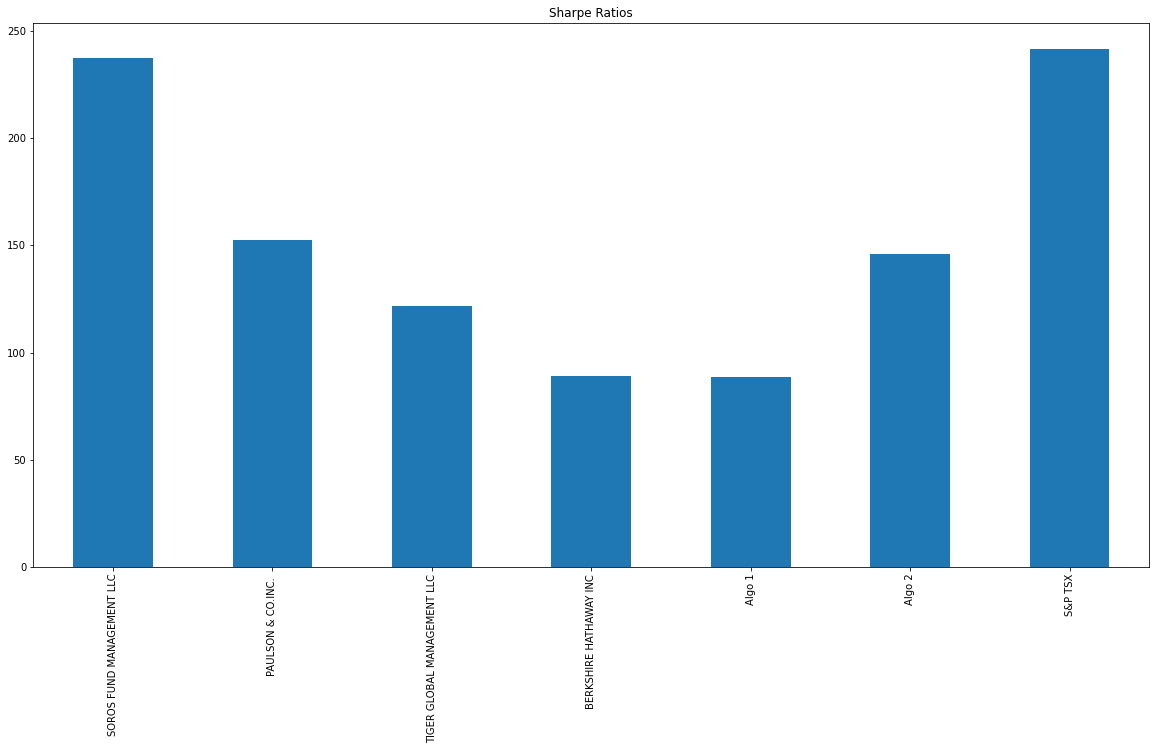

In [40]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios" , figsize = (20,10))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

No.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [41]:
# assigning variables
L = Path("l_historical.csv")
OTEX = Path("otex_historical.csv")
SHOP = Path("shop_historical.csv")

In [42]:
# Reading data from 1st stock
L_DF = pd.read_csv(L, usecols=['Date', 'Close'] ,  index_col='Date', parse_dates=True)
L_DF.rename(columns={'Close':'L'}, inplace=True)
L_DF.head()

,L
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [43]:
# Reading data from 2nd stock
OTEX_DF = pd.read_csv(OTEX, usecols=['Date', 'Close'] ,  index_col='Date', parse_dates=True)
OTEX_DF.rename(columns={'Close':'OTEX'}, inplace=True)
OTEX_DF.head()

,OTEX
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [44]:
# Reading data from 3rd stock

SHOP_DF = pd.read_csv(SHOP, usecols=['Date', 'Close'] ,  index_col='Date', parse_dates=True)
SHOP_DF.rename(columns={'Close':'SHOP'}, inplace=True)
SHOP_DF.head()

,SHOP
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [45]:
# Combine all stocks in a single DataFrame
PORTIFOLIO = pd.concat([SHOP_DF, L_DF, OTEX_DF], join='inner', axis=1)
PORTIFOLIO.head()

,SHOP,L,OTEX
Date,,,
2018-01-02,132.06,57.99,43.58
2018-01-03,135.15,57.41,43.07
2018-01-04,137.46,57.42,42.91
2018-01-05,137.26,57.42,42.57
2018-01-08,139.51,56.86,42.16


In [46]:
# Reset Date index


In [47]:
# Reorganize portfolio data by having a column per symbol


In [48]:
# Calculate daily returns
PORTIFOLIO_CHANGED = PORTIFOLIO.pct_change()
PORTIFOLIO_CHANGED.head()

# Drop NAs
PORTIFOLIO_CHANGED.dropna(inplace=True)

# Display sample data
PORTIFOLIO_CHANGED.head()

,SHOP,L,OTEX
Date,,,
2018-01-03,0.023398,-0.010002,-0.011703
2018-01-04,0.017092,0.000174,-0.003715
2018-01-05,-0.001455,0.000000,-0.007924
2018-01-08,0.016392,-0.009753,-0.009631
2018-01-09,-0.011254,0.008969,-0.000712


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [49]:
# Set weights
weights = [1/3, 1/3, 1/3]

weighted_returns = PORTIFOLIO_CHANGED.dot(weights)

# Calculate portfolio return


# Display sample data
weighted_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [50]:
# Join your returns DataFrame to the original returns DataFrame
all_portifolio_returns = pd.concat([weighted_returns, returns_cumprod_df], join='inner', axis=1)
all_portifolio_returns.rename(columns={0 :'MY PORTIFOLIO RETURNS'}, inplace=True)
all_portifolio_returns.head()

,MY PORTIFOLIO RETURNS,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,,
2018-01-03,0.000565,1.160766,0.814252,1.308812,1.329337,1.515053,1.215396,1.071839
2018-01-04,0.004517,1.159705,0.817669,1.322872,1.334740,1.513668,1.220615,1.074549
2018-01-05,-0.003126,1.164426,0.818342,1.323847,1.364135,1.507857,1.228433,1.070392
2018-01-08,-0.000997,1.169634,0.815282,1.330579,1.368820,1.510350,1.229241,1.068311
2018-01-09,-0.000999,1.168433,0.815994,1.332959,1.369790,1.508834,1.226671,1.068415


In [51]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portifolio_returns.dropna()

,MY PORTIFOLIO RETURNS,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,,
2018-01-03,0.000565,1.160766,0.814252,1.308812,1.329337,1.515053,1.215396,1.071839
2018-01-04,0.004517,1.159705,0.817669,1.322872,1.334740,1.513668,1.220615,1.074549
2018-01-05,-0.003126,1.164426,0.818342,1.323847,1.364135,1.507857,1.228433,1.070392
2018-01-08,-0.000997,1.169634,0.815282,1.330579,1.368820,1.510350,1.229241,1.068311
2018-01-09,-0.000999,1.168433,0.815994,1.332959,1.369790,1.508834,1.226671,1.068415
...,...,...,...,...,...,...,...,...
2019-04-25,0.003461,1.118163,0.754821,0.840272,1.348932,2.011144,1.196390,1.070504
2019-04-26,0.003243,1.127275,0.761736,0.850654,1.363007,2.017139,1.202677,1.072916
2019-04-29,0.003303,1.128689,0.763808,0.855971,1.370126,2.027645,1.206080,1.072071


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [52]:
# Calculate the annualized `std`
all_portifolio_returns.std() * np.sqrt(252)

MY PORTIFOLIO RETURNS          0.224346
SOROS FUND MANAGEMENT LLC      0.895390
PAULSON & CO.INC.              0.426632
TIGER GLOBAL MANAGEMENT LLC    2.243076
BERKSHIRE HATHAWAY INC         1.837515
Algo 1                         2.885643
Algo 2                         1.082787
S&P TSX                        0.624530
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'PLOT ROLLING STD'}, xlabel='Date'>

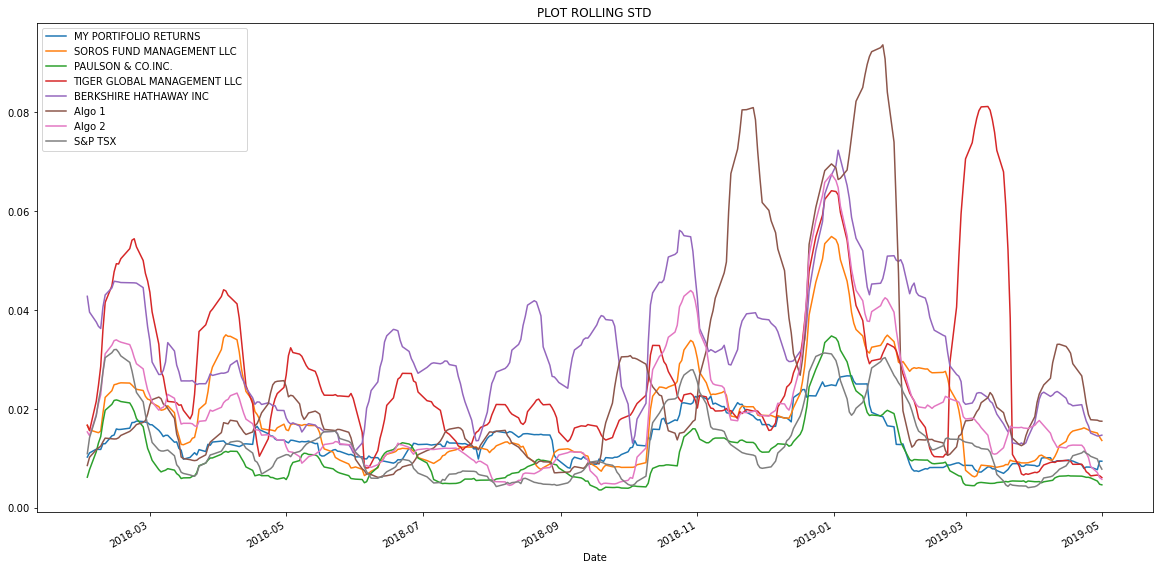

In [53]:
# Calculate rolling standard deviation
all_portifolio_roll = all_portifolio_returns.rolling(window=21).std()

# Plot rolling standard deviation
all_portifolio_roll.plot(figsize = (20,10) , title = "PLOT ROLLING STD")

### Calculate and plot the correlation

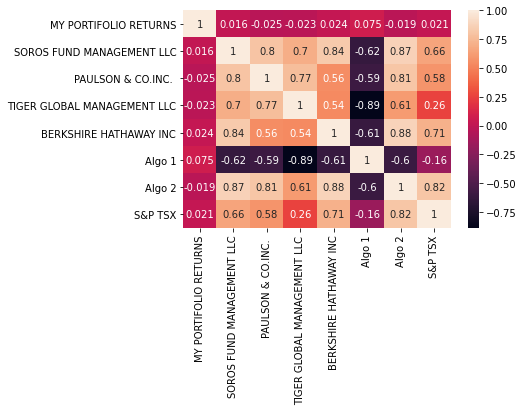

In [54]:
# Calculate and plot the correlation
all_portifolio_returns_df = all_portifolio_returns.corr()
sn.heatmap(all_portifolio_returns_df, annot=True)
plt.show()

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

Date
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
2018-01-09         NaN
                ...   
2019-04-25   -0.000030
2019-04-26   -0.000028
2019-04-29   -0.000019
2019-04-30    0.000004
2019-05-01    0.000010
Length: 328, dtype: float64


<AxesSubplot:title={'center':'MY PORTIFOLIO 60 DAYS'}, xlabel='Date'>

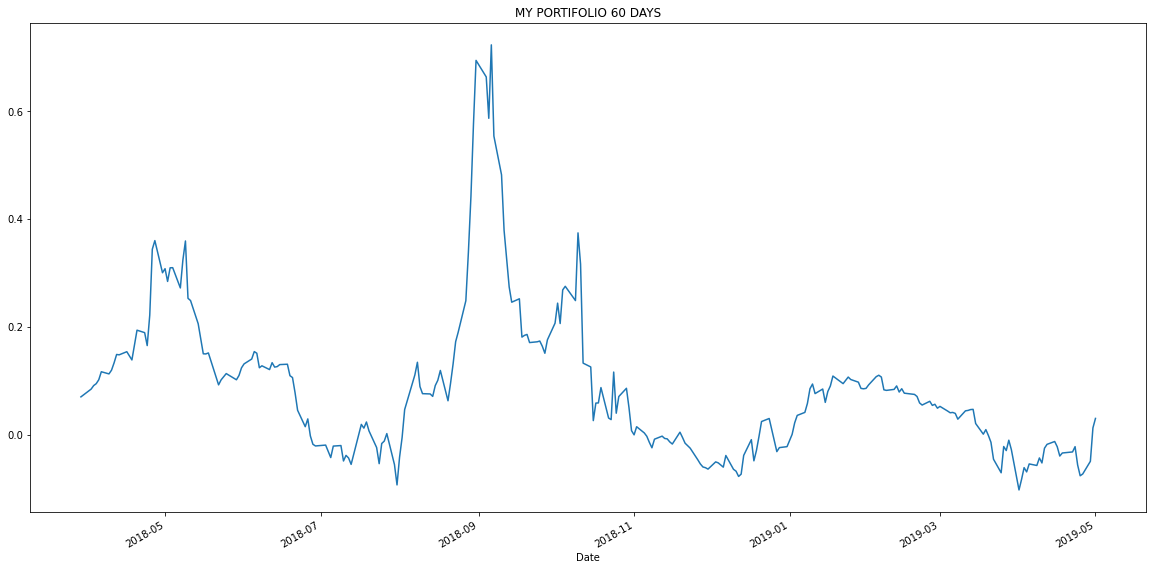

In [64]:
# Calculate and plot Beta
covariance_df = all_portifolio_returns["MY PORTIFOLIO RETURNS"].rolling(window=60).cov(all_portifolio_returns["S&P TSX"])
print (covariance_df)              
# Calculate variance of S&P TSX

variance_df = all_portifolio_returns["S&P TSX"].rolling(window=60).var()

# Computing beta
beta_all_portofolio = covariance_df / variance_df

# Plot beta trend
beta_all_portofolio.plot(title="MY PORTIFOLIO 60 DAYS" , figsize = (20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [65]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratio_all = (all_portifolio_returns.mean() * 252) / (all_portifolio_returns.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios All'}>

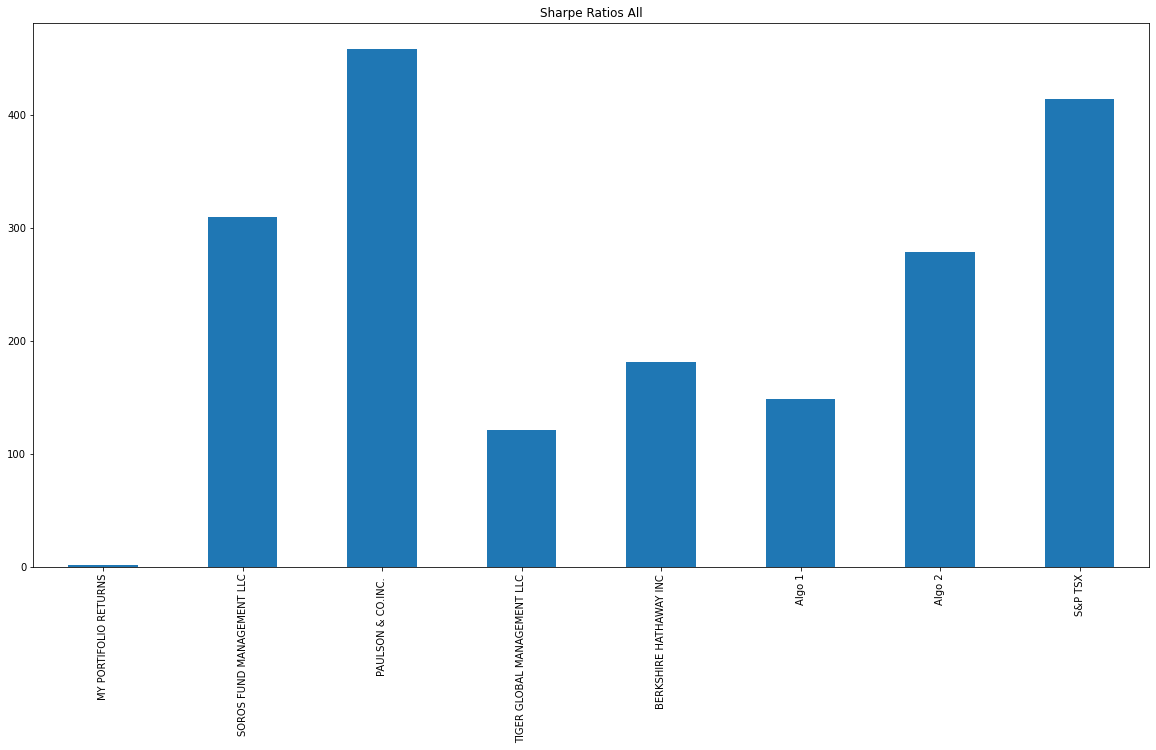

In [66]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_all.plot.bar(title="Sharpe Ratios All" , figsize = (20,10))

### How does your portfolio do?

Write your answer here!

Very poorly.